In [14]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, datasets, layers
from matplotlib import pyplot as plt

In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

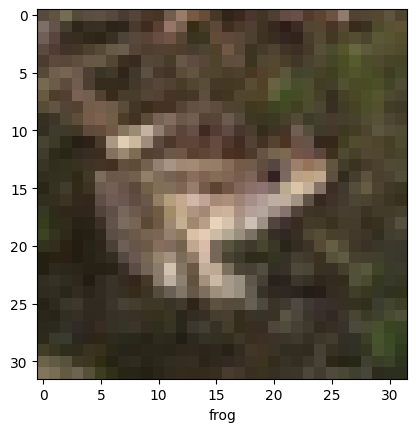

In [ ]:
# Let's look at a one image
IMG_INDEX = 22  # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Here we define our CNN Architecture

In [ ]:
model = models.Sequential()
# This is the input layer (first layer), 32 is the number of filters we want to
# implement in this layer, 3by3 is the size of each filter, then we apply an activation function to the output of feature mapping (output of filters)
# and the input shape is just determining the shape of each image that we feed
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))

# Then after each layer, we add a pooling layer which basically compress and reduce the size of the output feature mapping resulting from previous layer
# 2by2 is the size which we want it to become
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [7]:
model.summary()  # let's have a look at our model so far

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# So far we just defined the CNN architecture which basically detects the patterns i image
# Now we need to add a dense classifier (or any other) layer at top of (end of)
# the CNN arcitecture, to actually classify the images based on the extracted features from the CNN layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Now we Train the model

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(train_images, train_labels, epochs=4)

Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.6616 - loss: 0.9812
0.6615999937057495


This project ends here, the following part is just a trich when we want to increase the size of our dataset in order to achieve a better performance result, without necessarily gather more unique instances.

In this case, we use "Data Augmentation" technique,which is basically using different variants of our dataset instances, like flipping it, rotating it, zooming in and out and etc., in order to increase our dataset size and also our model could generalize better. We use "ImageDataGenerator" from TF for this case

In [16]:
!pip install scipy

   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
    --------------------------------------- 0.5/38.7 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.0/38.7 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.6/38.7 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.8/38.7 MB 2.4 MB/s eta 0:00:16
   -- ------------------------------------- 2.6/38.7 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 3.9/38.7 MB 3.3 MB/s eta 0:00:11
   ----- ---------------------------------- 5.0/38.7 MB 3.6 MB/s eta 0:00:10
   ----- ---------------------------------- 5.8/38.7 MB 3.6 MB/s eta 0:00:10
   ------- -------------------------------- 6.8/38.7 MB 3.7 MB/s eta 0:00:09
   ------- -------------------------------- 7.6/38.7 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 8.4/38.7 MB 3.8 MB/s eta 0:00:08
   ---------- ----------------------------- 9.7/38.7 MB 4.0 MB/s eta 0:00:08
   ---

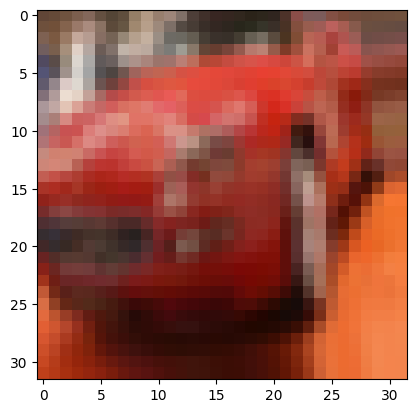

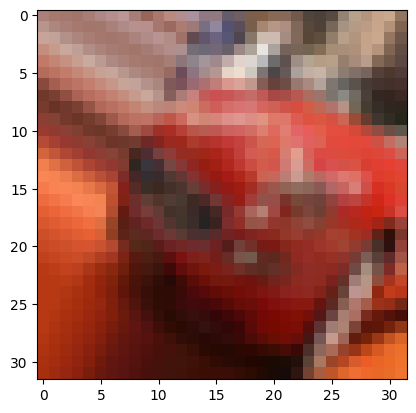

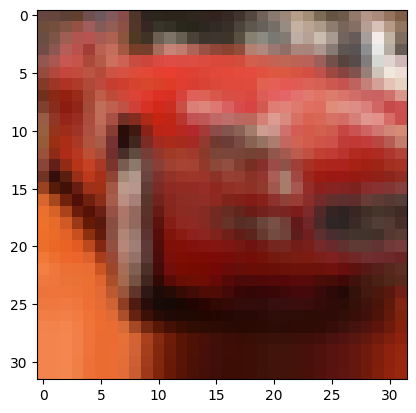

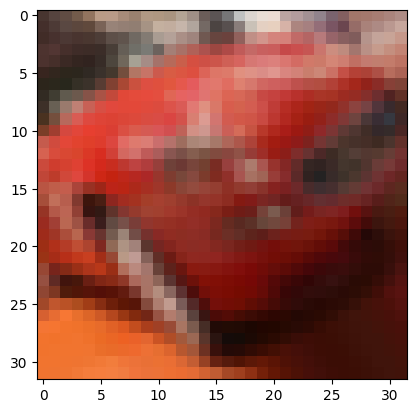

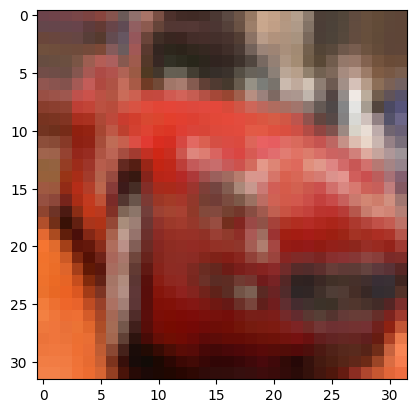

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

# pick an image to transform
test_img = train_images[5]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(
    img, save_prefix="test", save_format="jpeg"
):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

Source:

FreeCodeCamp TensorFlow tutorial: https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/convolutional-neural-networks